In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
from glob import glob
import seaborn as sns
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### **In this part, the binary classification of psoriasis and similar conditions is performed.**

In [ ]:
train_path = '/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/Binary Dataset/train'
test_path = '/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/Binary Dataset/test'

In [ ]:
folders = glob('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/Binary Dataset/train/*')
print(len(folders))

2


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (224, 224),
                                                batch_size=32,
                                
                                                 class_mode = 'categorical')

Found 1680 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            shuffle=False,
                                            batch_size=32,
                                            class_mode = 'categorical')

Found 420 images belonging to 2 classes.


In [ ]:
input_tensor=Input(shape=(224,224,3))

In [ ]:
model1 = ResNet50V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model1.layers:
  layer.tranable=True

In [ ]:
x = GlobalAveragePooling2D(name='Pooling')(model1.output)
x = Flatten(name='flatten')(x)
x = Dense(100, kernel_regularizer=regularizers.l2(0.001),activation='softmax', name='fc1')(x)
x=Dropout(0.5)(x)
x = Dense(2,activation='softmax', name='fc2')(x)
model1 = Model(inputs=input_tensor, outputs=x)

In [ ]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
sgd = optimizers.SGD()
model1.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet50V2_Binary_regular.hdf5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model1_history=model1.fit(
    train_set,
  validation_data=test_set,
  epochs=50,
    callbacks=callbacks ,verbose=1)

duration = datetime.now() - start
print("Training time: ", duration)

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.8812 - accuracy: 0.5917
Epoch 1: val_accuracy improved from -inf to 0.61429, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet50V2_Binary_regular.hdf5
53/53 [==============================] - 795s 15s/step - loss: 0.8812 - accuracy: 0.5917 - val_loss: 0.8786 - val_accuracy: 0.6143
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.8778 - accuracy: 0.6113
Epoch 2: val_accuracy did not improve from 0.61429
53/53 [==============================] - 38s 701ms/step - loss: 0.8778 - accuracy: 0.6113 - val_loss: 0.8752 - val_accuracy: 0.6119
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.8745 - accuracy: 0.6131
Epoch 3: val_accuracy did not improve from 0.61429
53/53 [==============================] - 37s 692ms/step - loss: 0.8745 - accuracy: 0.6131 - val_loss: 0.8723 - val_accuracy: 0.6119
Epoch 4/50
53/53 [==============================]

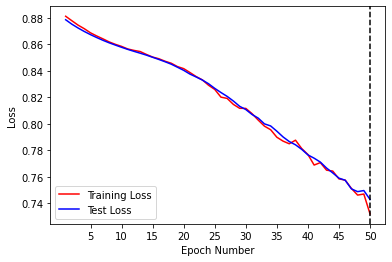

In [ ]:
test_loss=model1_history.history['val_loss']
training_loss=model1_history.history['loss']
epoch_count=range(1, len(test_loss)+1)
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, test_loss, 'b-')
minposs = test_loss.index(min(test_loss))+1 
plt.axvline(minposs, linestyle='--', color='k',label='Minimum Test Loss')
plt.xticks(np.arange(5, 51, 5))
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.show()

In [ ]:
network1 = load_model('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet50V2_Binary_regular.hdf5')

In [ ]:
test_set_evaluation = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 420 images belonging to 2 classes.


In [ ]:
network1.evaluate(test_set_evaluation, steps=len(test_set_evaluation))

420/420 [==============================] - 12s 25ms/step - loss: 0.8786 - accuracy: 0.6143


[0.8785776495933533, 0.6142857074737549]

In [ ]:
# Making Predictions
predictions1=network1.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds1=np.argmax(predictions1, axis=1)

420/420 [==============================] - 9s 19ms/step


0.6142857142857143

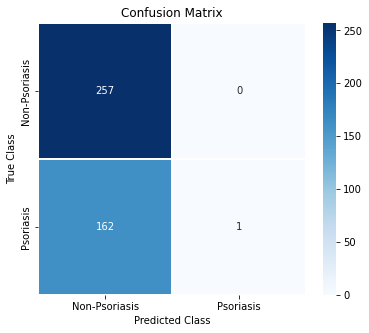

In [ ]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds1)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis']); ax.yaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds1)

In [ ]:
model2 = ResNet101V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model2.layers:
  layer.tranable=True

171327488/171317808 [==============================] - 6s 0us/step


In [ ]:
x = GlobalAveragePooling2D(name='Pooling')(model2.output)
x = Flatten(name='flatten')(x)
x = Dense(100, kernel_regularizer=regularizers.l2(0.001),activation='softmax', name='fc1')(x)
x=Dropout(0.5)(x)
x = Dense(2,activation='softmax', name='fc2')(x)
model2 = Model(inputs=input_tensor, outputs=x)

In [ ]:
model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_Binary_regular.hdf5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model2_history=model2.fit(
    train_set,
  validation_data=test_set,
  epochs=50,
    callbacks=callbacks ,verbose=1)

duration = datetime.now() - start
print("Training time: ", duration)

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.8824 - accuracy: 0.5619
Epoch 1: val_accuracy improved from -inf to 0.60476, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_Binary_regular.hdf5
53/53 [==============================] - 76s 1s/step - loss: 0.8824 - accuracy: 0.5619 - val_loss: 0.8815 - val_accuracy: 0.6048
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.8786 - accuracy: 0.6125
Epoch 2: val_accuracy improved from 0.60476 to 0.61190, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_Binary_regular.hdf5
53/53 [==============================] - 64s 1s/step - loss: 0.8786 - accuracy: 0.6125 - val_loss: 0.8777 - val_accuracy: 0.6119
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.8750 - accuracy: 0.6131
Epoch 3: val_accuracy did not improve from 0.61190
53/53 [==============================] - 61s 1s/step - loss:

In [ ]:
network2 = load_model('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_Binary_regular.hdf5')

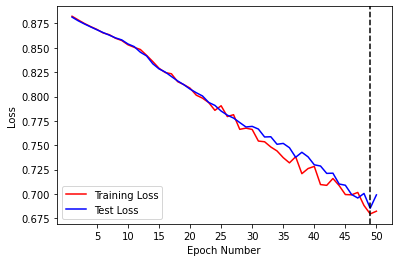

In [ ]:
test_loss=model2_history.history['val_loss']
training_loss=model2_history.history['loss']
epoch_count=range(1, len(test_loss)+1)
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, test_loss, 'b-')
minposs = test_loss.index(min(test_loss))+1 
plt.axvline(minposs, linestyle='--', color='k',label='Minimum Test Loss')
plt.xticks(np.arange(5, 51, 5))
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.show()

In [ ]:
network2.evaluate(test_set_evaluation, steps=len(test_set_evaluation))

420/420 [==============================] - 21s 45ms/step - loss: 0.6854 - accuracy: 0.7571


[0.6853541731834412, 0.7571428418159485]

In [ ]:
# Making Predictions
predictions2=network2.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds2=np.argmax(predictions2, axis=1)

420/420 [==============================] - 18s 38ms/step


0.7571428571428571

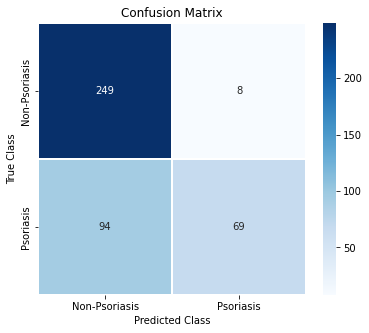

In [ ]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds2)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis']); ax.yaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds2)

In [ ]:
model3 = ResNet152V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model3.layers:
  layer.tranable=True

234561536/234545216 [==============================] - 2s 0us/step


In [ ]:
x = GlobalAveragePooling2D(name='Pooling')(model3.output)
x = Flatten(name='flatten')(x)
x = Dense(100, kernel_regularizer=regularizers.l2(0.001),activation='softmax', name='fc1')(x)
x=Dropout(0.5)(x)
x = Dense(2,activation='softmax', name='fc2')(x)
model3 = Model(inputs=input_tensor, outputs=x)

In [ ]:
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_Binary_regular.hdf5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model3_history=model3.fit(
    train_set,
  validation_data=test_set,
  epochs=50,
    callbacks=callbacks ,verbose=1)

duration = datetime.now() - start
print("Training time: ", duration)

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.8843 - accuracy: 0.4685
Epoch 1: val_accuracy improved from -inf to 0.58810, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_Binary_regular.hdf5
53/53 [==============================] - 294s 5s/step - loss: 0.8843 - accuracy: 0.4685 - val_loss: 0.8817 - val_accuracy: 0.5881
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.8803 - accuracy: 0.5869
Epoch 2: val_accuracy improved from 0.58810 to 0.61190, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_Binary_regular.hdf5
53/53 [==============================] - 123s 2s/step - loss: 0.8803 - accuracy: 0.5869 - val_loss: 0.8782 - val_accuracy: 0.6119
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.8763 - accuracy: 0.6137
Epoch 3: val_accuracy did not improve from 0.61190
53/53 [==============================] - 119s 2s/step - lo

In [ ]:
network3 = load_model('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_Binary_regular.hdf5')

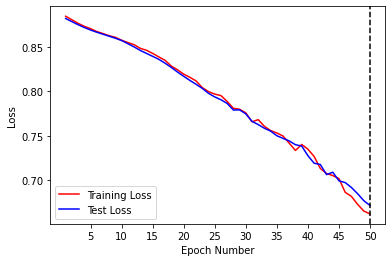

In [ ]:
test_loss=model3_history.history['val_loss']
training_loss=model3_history.history['loss']
epoch_count=range(1, len(test_loss)+1)
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, test_loss, 'b-')
minposs = test_loss.index(min(test_loss))+1 
plt.axvline(minposs, linestyle='--', color='k',label='Minimum Test Loss')
plt.xticks(np.arange(5, 51, 5))
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.show()

In [ ]:
network3.evaluate(test_set_evaluation, steps=len(test_set_evaluation))

420/420 [==============================] - 40s 87ms/step - loss: 0.6717 - accuracy: 0.8429


[0.6716517210006714, 0.8428571224212646]

In [ ]:
# Making Predictions
predictions3=network3.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds3=np.argmax(predictions3, axis=1)

420/420 [==============================] - 35s 77ms/step


0.8428571428571429

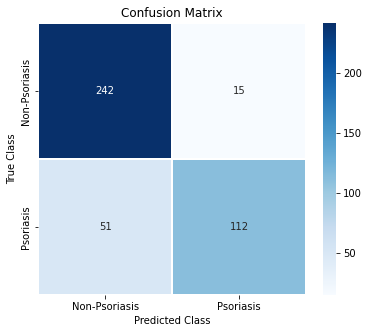

In [ ]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds3)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis']); ax.yaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds3)

In [ ]:
networks = [network1, network2, network3]
preds_1 = [network.predict(test_set_evaluation) for network in networks]
preds_1=np.array(preds_1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds_1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(test_set.classes, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                          'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])    

Max accuracy of  84.28571428571429  obained with w1= 0.0  w2= 0.0  and w3= 0.1


In [ ]:
networks = [network1, network2, network3]
preds = [network.predict(test_set_evaluation) for network in networks]
preds=np.array(preds)
ideal_weights = [max_acc_row[0], max_acc_row[1], max_acc_row[2]] 
np.save('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/Results/weights_binary.npy', ideal_weights)
#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(test_set.classes, ideal_weighted_ensemble_prediction)

[Text(0, 0.5, 'Non-Psoriasis'), Text(0, 1.5, 'Psoriasis')]

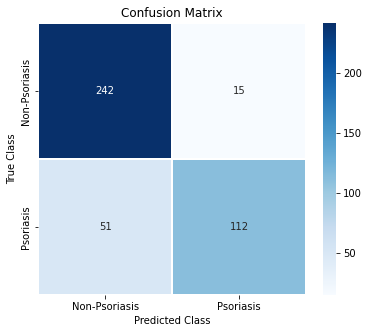

In [ ]:
cf_matrix=confusion_matrix(test_set_evaluation.classes, ideal_weighted_ensemble_prediction)
ax=plt.figure(figsize=(6,5))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis']); ax.yaxis.set_ticklabels(['Non-Psoriasis', 'Psoriasis'])

### **In this part, the multi-class classification of variants of psoriasis is performed.**

In [4]:
train_path = '/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/Multi Class Dataset/train'
test_path = '/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/Multi Class Dataset/test'

In [5]:
folders = glob('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/Multi Class Dataset/train/*')
print(len(folders))

7


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (224, 224),
                                                batch_size=32,
                                
                                                 class_mode = 'categorical')

Found 649 images belonging to 7 classes.


In [9]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            shuffle=False,
                                            batch_size=32,
                                            class_mode = 'categorical')

Found 164 images belonging to 7 classes.


In [10]:
input_tensor=Input(shape=(224,224,3))

In [11]:
model1 = ResNet50V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model1.layers:
  layer.tranable=True

94683136/94668760 [==============================] - 1s 0us/step


In [12]:
x = GlobalAveragePooling2D(name='Pooling')(model1.output)
x = Flatten(name='flatten')(x)
x = Dense(100, kernel_regularizer=regularizers.l2(0.001),activation='softmax', name='fc1')(x)
x=Dropout(0.5)(x)
x = Dense(7,activation='softmax', name='fc2')(x)
model1 = Model(inputs=input_tensor, outputs=x)

In [13]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [14]:
model1.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [16]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet50V2_MultiClass_regular.hdf5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model1_history=model1.fit(
    train_set,
  validation_data=test_set,
  epochs=50,
    callbacks=callbacks ,verbose=1)

duration = datetime.now() - start
print("Training time: ", duration)

Epoch 1/50
21/21 [==============================] - ETA: 0s - loss: 2.0982 - accuracy: 0.4160
Epoch 1: val_accuracy improved from -inf to 0.42073, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet50V2_MultiClass_regular.hdf5
21/21 [==============================] - 61s 3s/step - loss: 2.0982 - accuracy: 0.4160 - val_loss: 2.0868 - val_accuracy: 0.4207
Epoch 2/50
21/21 [==============================] - ETA: 0s - loss: 2.0767 - accuracy: 0.4222
Epoch 2: val_accuracy did not improve from 0.42073
21/21 [==============================] - 16s 740ms/step - loss: 2.0767 - accuracy: 0.4222 - val_loss: 2.0650 - val_accuracy: 0.4207
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 2.0542 - accuracy: 0.4222
Epoch 3: val_accuracy did not improve from 0.42073
21/21 [==============================] - 16s 722ms/step - loss: 2.0542 - accuracy: 0.4222 - val_loss: 2.0448 - val_accuracy: 0.4207
Epoch 4/50
21/21 [=============================

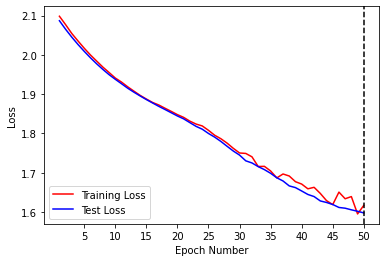

In [17]:
test_loss=model1_history.history['val_loss']
training_loss=model1_history.history['loss']
epoch_count=range(1, len(test_loss)+1)
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, test_loss, 'b-')
minposs = test_loss.index(min(test_loss))+1 
plt.axvline(minposs, linestyle='--', color='k',label='Minimum Test Loss')
plt.xticks(np.arange(5, 51, 5))
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.show()

In [18]:
network1 = load_model('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet50V2_MultiClass_regular.hdf5')

In [19]:
test_set_evaluation = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 164 images belonging to 7 classes.


In [20]:
test_set_evaluation = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode = 'categorical')
network1.evaluate(test_set_evaluation, steps=len(test_set_evaluation))

Found 164 images belonging to 7 classes.
164/164 [==============================] - 7s 30ms/step - loss: 1.5976 - accuracy: 0.5915


[1.5976407527923584, 0.5914633870124817]

In [21]:
# Making Predictions
predictions1=network1.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds1=np.argmax(predictions1, axis=1)

164/164 [==============================] - 4s 20ms/step


0.5914634146341463

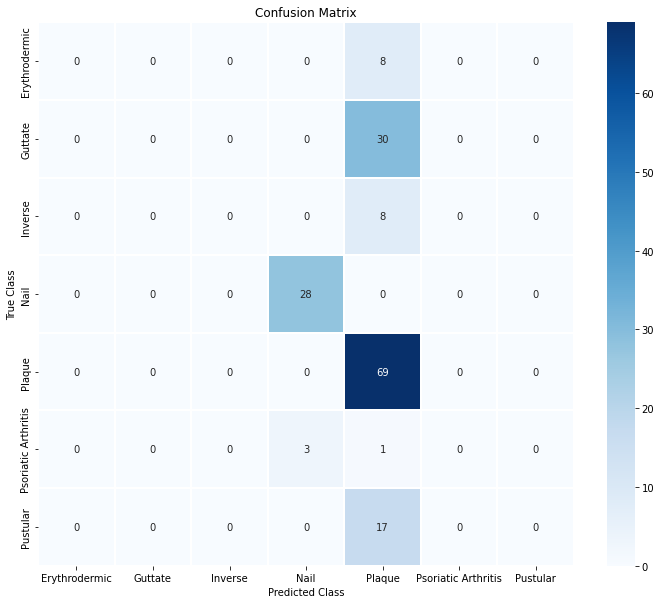

In [22]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds1)
ax=plt.figure(figsize=(12,10))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular']); ax.yaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds1)

In [23]:
model2 = ResNet101V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model2.layers:
  layer.tranable=True

171327488/171317808 [==============================] - 1s 0us/step


In [24]:
x = GlobalAveragePooling2D(name='Pooling')(model2.output)
x = Flatten(name='flatten')(x)
x = Dense(100, kernel_regularizer=regularizers.l2(0.001),activation='softmax', name='fc1')(x)
x=Dropout(0.5)(x)
x = Dense(7,activation='softmax', name='fc2')(x)
model2 = Model(inputs=input_tensor, outputs=x)

In [25]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [26]:
model2.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [27]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_MultiClass_regular.hdf5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model2_history=model2.fit(
    train_set,
  validation_data=test_set,
  epochs=50,
    callbacks=callbacks ,verbose=1)

duration = datetime.now() - start
print("Training time: ", duration)

Epoch 1/50
21/21 [==============================] - ETA: 0s - loss: 2.1244 - accuracy: 0.2589
Epoch 1: val_accuracy improved from -inf to 0.40244, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_MultiClass_regular.hdf5
21/21 [==============================] - 43s 1s/step - loss: 2.1244 - accuracy: 0.2589 - val_loss: 2.1146 - val_accuracy: 0.4024
Epoch 2/50
21/21 [==============================] - ETA: 0s - loss: 2.0994 - accuracy: 0.4237
Epoch 2: val_accuracy improved from 0.40244 to 0.42073, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_MultiClass_regular.hdf5
21/21 [==============================] - 28s 1s/step - loss: 2.0994 - accuracy: 0.4237 - val_loss: 2.0906 - val_accuracy: 0.4207
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 2.0760 - accuracy: 0.4222
Epoch 3: val_accuracy did not improve from 0.42073
21/21 [==============================] - 25s 1s/step

In [28]:
network2 = load_model('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet101V2_MultiClass_regular.hdf5')

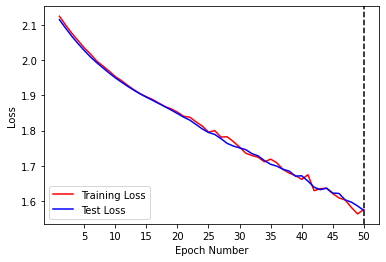

In [29]:
test_loss=model2_history.history['val_loss']
training_loss=model2_history.history['loss']
epoch_count=range(1, len(test_loss)+1)
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, test_loss, 'b-')
minposs = test_loss.index(min(test_loss))+1 
plt.axvline(minposs, linestyle='--', color='k',label='Minimum Test Loss')
plt.xticks(np.arange(5, 51, 5))
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.show()

In [30]:
network2.evaluate(test_set_evaluation, steps=len(test_set_evaluation))

164/164 [==============================] - 10s 48ms/step - loss: 2.0906 - accuracy: 0.4207


[2.090590238571167, 0.42073169350624084]

In [31]:
# Making Predictions
predictions2=network2.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds2=np.argmax(predictions2, axis=1)

164/164 [==============================] - 8s 38ms/step


0.42073170731707316

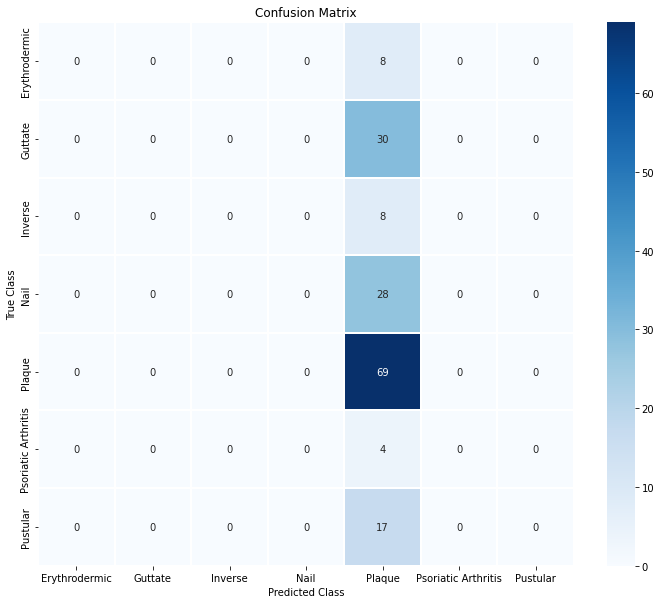

In [32]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds2)
ax=plt.figure(figsize=(12,10))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular']); ax.yaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds2)

In [33]:
model3 = ResNet152V2(input_tensor=input_tensor, weights='imagenet', include_top=False)
for layer in model3.layers:
  layer.tranable=True

234561536/234545216 [==============================] - 2s 0us/step


In [34]:
x = GlobalAveragePooling2D(name='Pooling')(model3.output)
x = Flatten(name='flatten')(x)
x = Dense(100, kernel_regularizer=regularizers.l2(0.001),activation='softmax', name='fc1')(x)
x=Dropout(0.5)(x)
x = Dense(7,activation='softmax', name='fc2')(x)
model3 = Model(inputs=input_tensor, outputs=x)

In [35]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [36]:
model3.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [37]:
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_MultiClass_regular.hdf5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model3_history=model3.fit(
    train_set,
  validation_data=test_set,
  epochs=50,
    callbacks=callbacks ,verbose=1)

duration = datetime.now() - start
print("Training time: ", duration)

Epoch 1/50
21/21 [==============================] - ETA: 0s - loss: 2.1363 - accuracy: 0.0971
Epoch 1: val_accuracy improved from -inf to 0.29878, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_MultiClass_regular.hdf5
21/21 [==============================] - 64s 2s/step - loss: 2.1363 - accuracy: 0.0971 - val_loss: 2.1201 - val_accuracy: 0.2988
Epoch 2/50
21/21 [==============================] - ETA: 0s - loss: 2.1105 - accuracy: 0.3837
Epoch 2: val_accuracy improved from 0.29878 to 0.42073, saving model to /content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_MultiClass_regular.hdf5
21/21 [==============================] - 39s 2s/step - loss: 2.1105 - accuracy: 0.3837 - val_loss: 2.0957 - val_accuracy: 0.4207
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 2.0848 - accuracy: 0.4222
Epoch 3: val_accuracy did not improve from 0.42073
21/21 [==============================] - 36s 2s/step

In [38]:
network3 = load_model('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/ResNet152V2_MultiClass_regular.hdf5')

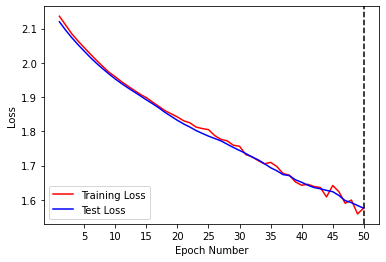

In [39]:
test_loss=model3_history.history['val_loss']
training_loss=model3_history.history['loss']
epoch_count=range(1, len(test_loss)+1)
plt.plot(epoch_count, training_loss, 'r-')
plt.plot(epoch_count, test_loss, 'b-')
minposs = test_loss.index(min(test_loss))+1 
plt.axvline(minposs, linestyle='--', color='k',label='Minimum Test Loss')
plt.xticks(np.arange(5, 51, 5))
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.show()

In [40]:
network3.evaluate(test_set_evaluation, steps=len(test_set_evaluation))

164/164 [==============================] - 15s 67ms/step - loss: 1.5755 - accuracy: 0.5732


[1.5755118131637573, 0.5731707215309143]

In [41]:
# Making Predictions
predictions3=network3.predict(test_set_evaluation, steps=len(test_set_evaluation), verbose=1)
preds3=np.argmax(predictions3, axis=1)

164/164 [==============================] - 12s 55ms/step


0.573170731707317

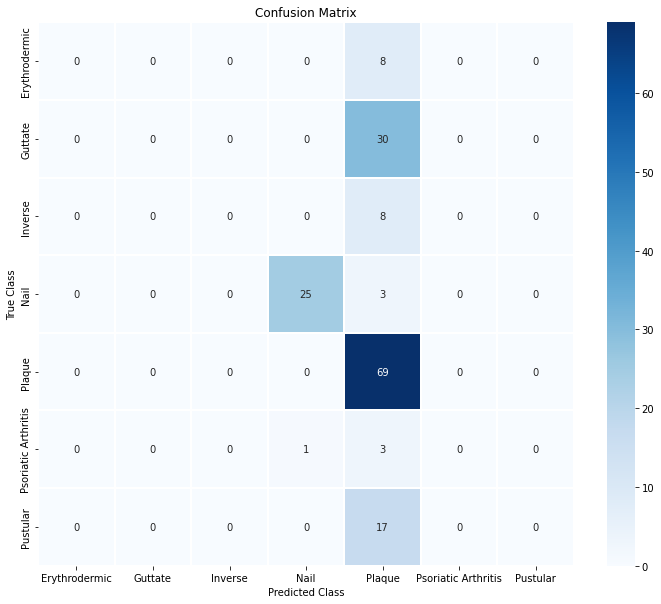

In [42]:
# Creating the Confusion Matrix
cf_matrix=confusion_matrix(test_set_evaluation.classes, preds3)
ax=plt.figure(figsize=(12,10))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular']); ax.yaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular'])
from sklearn.metrics import accuracy_score
accuracy_score(test_set_evaluation.classes, preds3)

In [43]:
networks = [network1, network2, network3]
preds_1 = [network.predict(test_set_evaluation) for network in networks]
preds_1=np.array(preds_1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds_1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(test_set.classes, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                          'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])    

Max accuracy of  59.14634146341463  obained with w1= 0.1  w2= 0.0  and w3= 0.0


In [44]:
networks = [network1, network2, network3]
preds = [network.predict(test_set_evaluation) for network in networks]
preds=np.array(preds)
ideal_weights = [max_acc_row[0], max_acc_row[1], max_acc_row[2]] 
np.save('/content/drive/MyDrive/Research Group UT SUT UoA/Technical Calculations/weights_MultiClass_regular.npy', ideal_weights)
#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(test_set.classes, ideal_weighted_ensemble_prediction)

[Text(0, 0.5, 'Erythrodermic'),
 Text(0, 1.5, 'Guttate'),
 Text(0, 2.5, 'Inverse'),
 Text(0, 3.5, 'Nail'),
 Text(0, 4.5, 'Plaque'),
 Text(0, 5.5, 'Psoriatic Arthritis'),
 Text(0, 6.5, 'Pustular')]

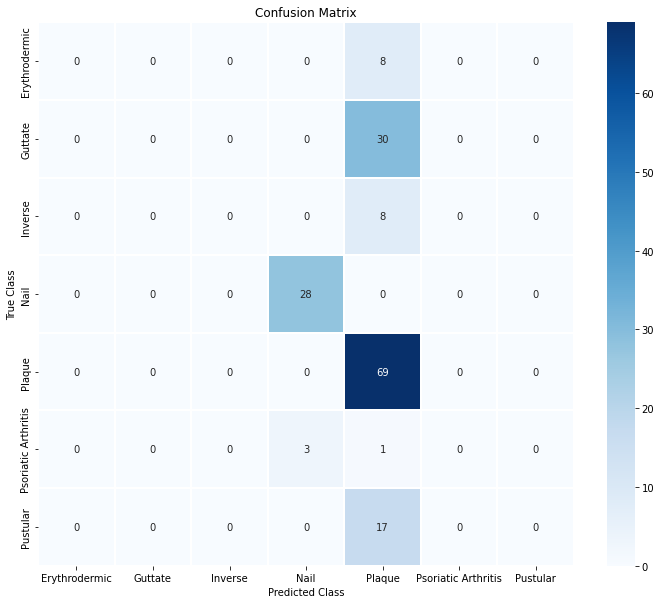

In [45]:
cf_matrix=confusion_matrix(test_set_evaluation.classes, ideal_weighted_ensemble_prediction)
ax=plt.figure(figsize=(12,10))
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular']); ax.yaxis.set_ticklabels(['Erythrodermic', 'Guttate', 'Inverse', 'Nail', 'Plaque', 'Psoriatic Arthritis', 'Pustular'])